In [1]:
import numpy as np
from spec_id import Scale_model, Cluster, Cluster_model,Gauss_dist,Divide_cont, Cluster_fit,Likelihood_contours
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
metal=np.arange(0.002,0.031,0.001)
# age=np.arange(.5,14.1,.1)
age=np.arange(7.0,14.1,.1)
tau=[0]

M,A=np.meshgrid(metal,age)

cluster=[6528,6553,5927,6304,6388,6441]

In [32]:
ngc6528=Cluster('clusters/ngc6528_griz_err_fc.npy')

[[14 12]]
Best fit model is 8.4 Gyr and 0.014 Z


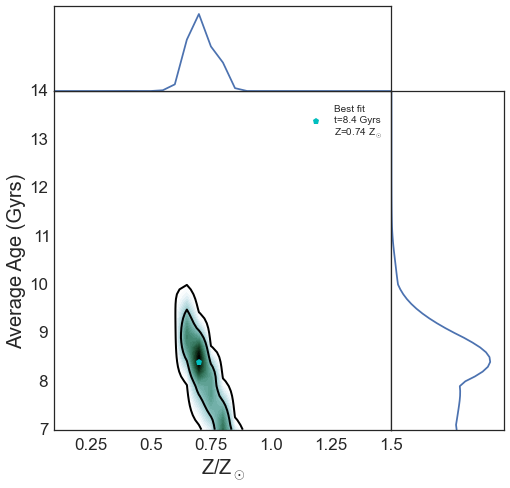

137.828897638


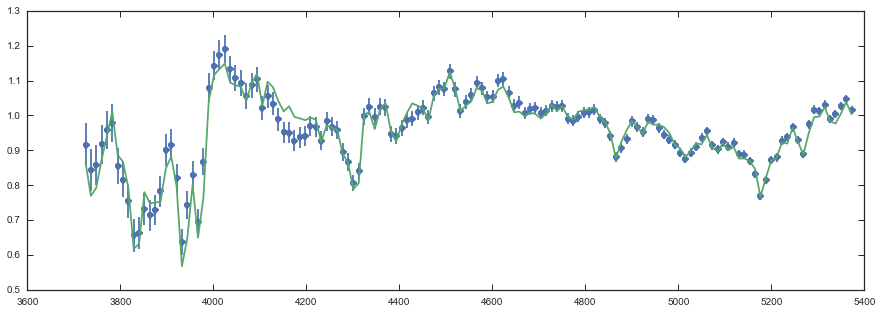

In [33]:
%matplotlib inline

ngc6528.Analyze_fit('chidat/ngc6528_err_fc_chidata.fits',metal,age)
ngc6528.Plot_2D_likelihood()
ngc6528.Remove_continuum()
ngc6528.Best_fit_spec()

print sum(((ngc6528.nc_fl - ngc6528.nc_mfl)/ngc6528.nc_er)**2)

plt.figure(figsize=[15,5])
# plt.plot(ngc6528.nc_wv,ngc6528.nc_fl)
plt.errorbar(ngc6528.nc_wv,ngc6528.nc_fl,ngc6528.nc_er,fmt='o')
# plt.plot(ngc6528.nc_wv,ngc6528.nc_er)
plt.plot(ngc6528.nc_mwv,ngc6528.nc_mfl)
plt.show()
plt.close()

[[14 12]]
Best fit model is 8.4 Gyr and 0.014 Z


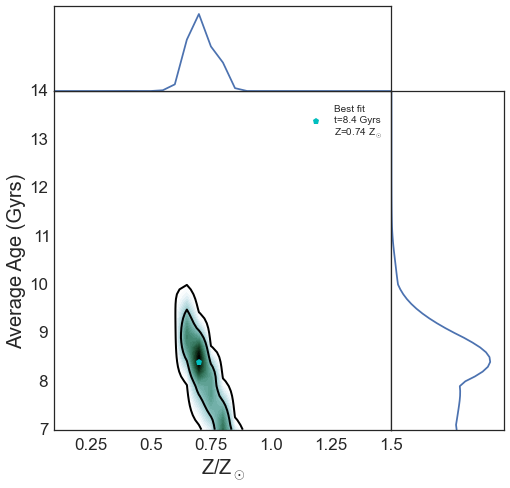

137.828897638


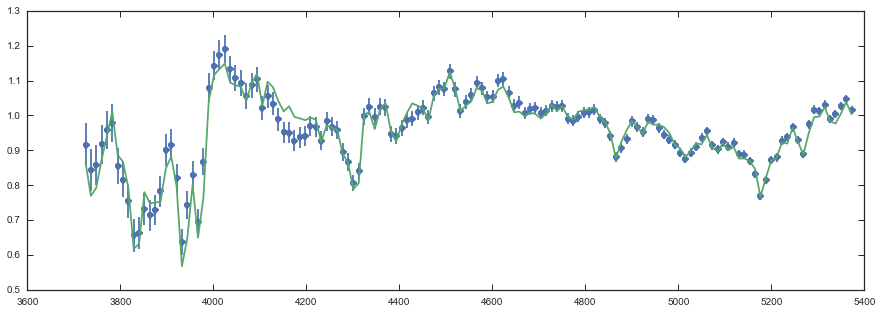

In [34]:
ngc6528.Analyze_fit_FC('chidat/ngc6528_err_fc_cont_chidata.fits','chidat/ngc6528_err_fc_feat_chidata.fits',metal,age)
ngc6528.Plot_2D_likelihood()
ngc6528.Remove_continuum()
ngc6528.Best_fit_spec()

print sum(((ngc6528.nc_fl - ngc6528.nc_mfl)/ngc6528.nc_er)**2)

plt.figure(figsize=[15,5])
# plt.plot(ngc6528.nc_wv,ngc6528.nc_fl)
plt.errorbar(ngc6528.nc_wv,ngc6528.nc_fl,ngc6528.nc_er,fmt='o')
# plt.plot(ngc6528.nc_wv,ngc6528.nc_er)
plt.plot(ngc6528.nc_mwv,ngc6528.nc_mfl)
plt.show()
plt.close()

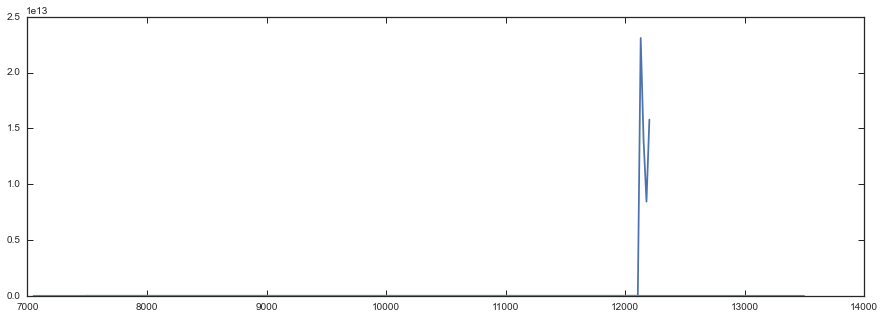

In [ ]:
wv,fl = Readfile('clusters/ngc6528_spec.dat')

plt.figure(figsize=[15,5])
plt.plot(ngc6528.wv,ngc6528.fl)
plt.plot(wv*(2.1),fl)
plt.show()
plt.close()

In [6]:
wv,fl = np.load('clusters/ngc6528_griz.npy')
wv,er = np.load('clusters/ngc6528_err_griz.npy')

In [ ]:
print fl[0:28]
print wv[0:28]

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
[ 6806.51307862  6830.70553989  6854.89800117  6879.09046245  6903.28292372
  6927.475385    6951.66784628  6975.86030755  7000.05276883  7024.24523011
  7048.43769139  7072.63015266  7096.82261394  7121.01507522  7145.20753649
  7169.39999777  7193.59245905  7217.78492032  7241.9773816   7266.16984288
  7290.36230415  7314.55476543  7338.74722671  7362.93968799  7387.13214926
  7411.32461054  7435.51707182  7459.70953309]


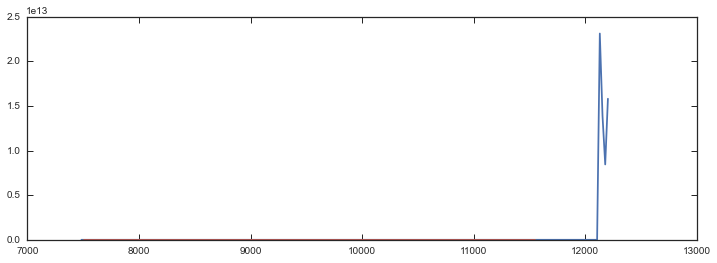

In [ ]:
%matplotlib inline

plt.figure(figsize=[12,4])
plt.plot(ngc6528.wv,ngc6528.fl)
# plt.plot(ngc6528.mwv,ngc6528.mfl)
plt.plot(wv[7500 < wv[wv < 11550]],fl[7500 < wv[wv < 11550]])
plt.plot(wv[7500 < wv[wv < 11550]],.0204*er[7500 < wv[wv < 11550]])
plt.show()
plt.close()

In [7]:
ncwv,ncfl,ncer=Divide_cont(wv[7900 < wv[wv < 11100]],fl[7900 < wv[wv < 11100]],0.0204*er[7900 < wv[wv < 11100]],1.1)

In [8]:
def Divide_cont2(wave,flux,error, z):
    wv = wave[7500 < wave[wave < 11500]]
    fl = flux[7500 < wave[wave < 11500]]
    er = error[7500 < wave[wave < 11500]]
    
    wi =wv
    w =wv/(1 + z)
    
    m2r = [3800,3850,3910,4030,4080,4125,4250, 4385,4515,4570,4810,4910,4975,5055,5110,5285]

    Mask = np.zeros(len(w))
    for i in range(len(Mask)):
        if m2r[0] <= w[i] <= m2r[1]:
            Mask[i] = 1
        if m2r[2] <= w[i] <= m2r[3]:
            Mask[i] = 1
        if m2r[4] <= w[i] <= m2r[5]:
            Mask[i] = 1
        if m2r[6] <= w[i] <= m2r[7]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[10] < w[i] <= m2r[11]:
            Mask[i] = 1
        if m2r[12] <= w[i] <= m2r[13]:
            Mask[i] = 1
        if m2r[14] <= w[i] <= m2r[15]:
            Mask[i] = 1

    maskw = np.ma.masked_array(w, Mask)

    # params= np.ma.polyfit(maskw, fl, 3, w=(1/er)**2)
    params= np.ma.polyfit(maskw, fl, 3)
    C0 = np.polyval(params,w)

    flx = fl/C0
    err = er/C0

    return w[7800 < wi[wi < 11300]], flx[7800 < wi[wi < 11300]], err[7800 < wi[wi < 11300]], C0[7800 < wi[wi < 11300]]

In [23]:
ncwv2,ncfl2,ncer2,C0=Divide_cont2(wv,fl,0.022*er,1.1)

ValueError: x and y must have same first dimension

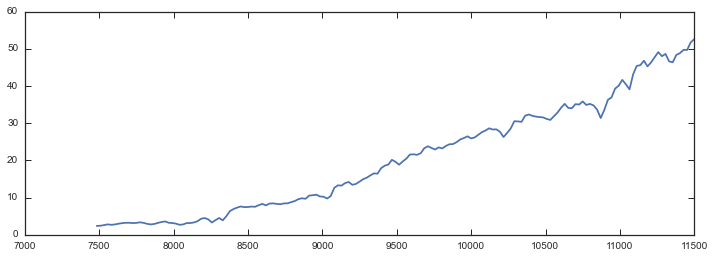

In [13]:
plt.figure(figsize=[12,4])
plt.plot(wv[wv<11500],fl[wv<11500])
plt.plot(wv[7900 < wv[wv < 11500]],C0)
plt.show()
plt.close()

In [14]:
clus_model = Cluster_model(0.015,9.8,wv[7500 < wv[wv < 11500]],fl[7500 < wv[wv < 11500]],er[7500 < wv[wv < 11500]])
clus_model.Remove_continuum()

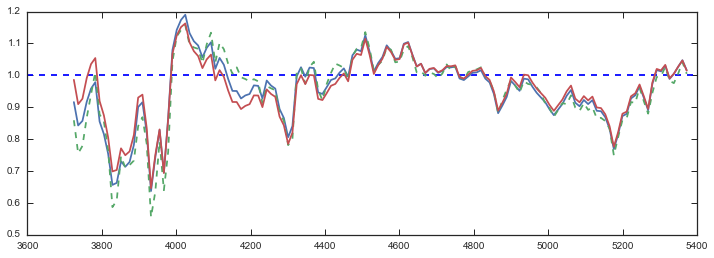

In [15]:
plt.figure(figsize=[12,4])
plt.axhline(1,linestyle='--')
plt.plot(ngc6528.nc_wv,ngc6528.nc_fl)
# plt.plot(ngc6528.nc_wv,ngc6528.nc_er)
plt.plot(clus_model.nc_wv,clus_model.nc_fl,'--')
# plt.plot(ngc6528.nc_mwv,ngc6528.nc_mfl)
# plt.plot(ncwv,ncfl)
plt.plot(ncwv2,ncfl2)
# plt.plot(ncwv,ncer)
# plt.plot(ncwv2,ncer2)
plt.show()
plt.close()

0.249974616639
1.00000319443
152.999092488


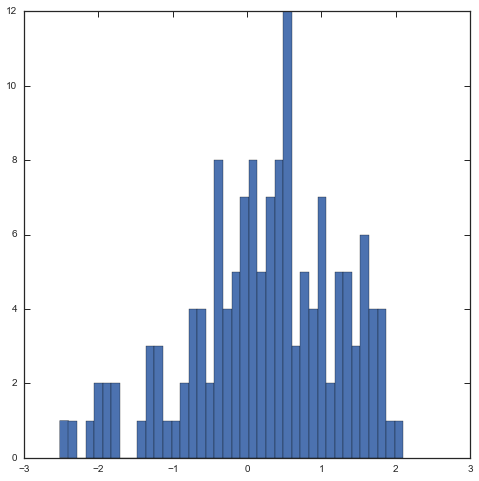

In [24]:
imfl = interp1d(clus_model.nc_wv,clus_model.nc_fl)(ncwv2)

sres = ((ncfl2 - imfl)/ncer2)

print np.mean(sres)
print np.std(sres)
print sum(((ncfl2 - imfl)/ncer2)**2)

plt.figure(figsize=[8,8])
plt.hist(sres,40)
plt.show()
plt.close()

In [ ]:
np.save('clusters/ngc6528_griz_err',[wv,fl,0.022*er])

In [25]:
Cluster_fit('clusters/ngc6528_griz_err.npy',metal,age,'ngc6528_err')

Done!
